https://github.com/sdasadia/Oil-Price-Prediction/blob/master/Oil%20Price%20Forecast.ipynb

https://github.com/sergeyivanov01/PHBS_MLF_2018/blob/master/BP2018.py

In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
import quandl
import math
import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('seaborn-darkgrid')

In [2]:
%store -r data_XLE

In [3]:
X = data_XLE.values
size = int(len(X) * 0.6)

In [4]:
# def test_stationarity(timeseries):
    
#     #Determing rolling statistics
#     rolmean = ts_log.rolling(1).mean()
#     rolstd = ts_log.rolling(1).std()

#     #Plot rolling statistics:
#     orig = plt.plot(ts, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
#     #Perform Dickey-Fuller test:
#     print ('Results of Dickey-Fuller Test:')
#     dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC' )
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print (dfoutput)

In [5]:
#print(data)

In [6]:
#ts = data

In [7]:
train, test = X[0:size], X[size:len(X)]


In [8]:
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=69.233829, expected=68.377380
predicted=68.637850, expected=67.761108
predicted=68.010754, expected=66.819145
predicted=67.068441, expected=67.369186
predicted=67.583771, expected=65.995605
predicted=66.197190, expected=65.100525
predicted=65.333624, expected=64.196617
predicted=64.432304, expected=61.617733
predicted=61.886521, expected=61.484818
predicted=61.759506, expected=59.366787
predicted=59.607200, expected=61.449371
predicted=61.632483, expected=56.238483
predicted=56.525561, expected=58.259033
predicted=58.391164, expected=56.530933
predicted=56.718560, expected=56.158722
predicted=56.297667, expected=55.884003
predicted=55.999946, expected=55.680332
predicted=55.779136, expected=57.001587
predicted=57.016788, expected=61.545647
predicted=61.386292, expected=61.804543
predicted=61.731250, expected=60.938591
predicted=60.943326, expected=60.733250
predicted=60.766542, expected=62.313419
predicted=62.289899, expected=58.903137
predicted=59.077878, expected=59.724453


predicted=63.283707, expected=61.062630
predicted=61.185628, expected=58.238411


In [9]:
error_XLE = math.sqrt(mean_squared_error(test, predictions))
%store error_XLE
print('Test RMSE: %.3f' % error_XLE)

Stored 'error_XLE' (float)
Test RMSE: 1.743


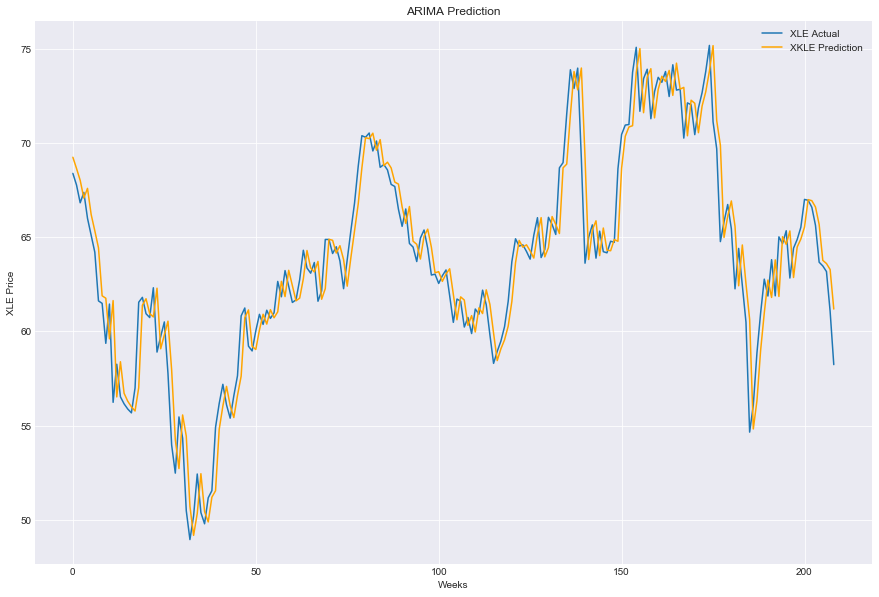

In [10]:
# plot
fig= plt.figure(figsize=(15,10))
plt.plot(test, label = 'XLE Actual')
plt.plot(predictions, color='orange', label = 'XKLE Prediction')
plt.xlabel('Weeks')
plt.ylabel('XLE Price')
plt.title('ARIMA Prediction')
plt.legend()
plt.show()

In [11]:
ARIMA_pred_XLE = pd.DataFrame(predictions) 
ARIMA_pred_XLE.columns = ['ARIMA_pred_XLE']
%store ARIMA_pred_XLE

Stored 'ARIMA_pred_XLE' (DataFrame)
